### Student Information
Name: 林靖岳

Student ID: 110034053

GitHub ID: attackofthetitan

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Tests

In [255]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/ethan/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.13 (main, Sep  2 2025, 14:20:25) [Clang 20.1.4 ]


[nltk_data] Downloading package punkt to /home/ethan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### import the dataset

In [256]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [257]:
df = df.drop(columns=['datetime', 'author', 'url', 'post_id', 'subreddit', 'type', ], axis=1) # drop columns that I think are useless for the data, due to unquantifiability, or not really useful 
df

,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,$ U.S. dollar value (crashing),2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,Analyst Recommendations,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,Weekend Discussion Thread for the Weekend of A...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


## Exercise 1

In [258]:
for t in df.text[:3]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


## Exercise 2 and Exercise 3 

In [259]:
col = ['sentiment', 'label']
for i in col:
    print(i, df[i].unique()) # here I check for any weird values in sentiment and label, which I don't find so no cleanup needed.

sentiment [-1.  1.  0.]
label [-1.  0.  1.]


## Exercise 4

In [260]:
df.isnull().sum() # look for how many missing values, downvotes are missing a lot, so is upvote ratio so them and upvotes will be dropped

# I can also see some missing data in entities, so drop that column since it looks to be strongly correlated to text and title anyways.

title             0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

## Exercise 5

In [261]:
count = 0
for i in df['entities']:
    if i == '[]':
        count += 1
print(count) # total entries with only "[]", treat as null values thus drop this entities (justifying decision to drop)

53


In [262]:
df = df.drop(columns=['upvotes', 'downvotes', 'upvote_ratio', 'entities'], axis=1)
df

,title,text,subjectivity,polarity,sentiment,label
0,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,-0.900000,-1.0,-1.0
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.000000,0.000000,0.0,-1.0
...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,1.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.000000,0.000000,0.0,0.0
844,Analyst Recommendations,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,-1.0


## Exercise 6

In [263]:
df_sample = df.sample(n=300)
for i in ['sentiment', 'label']:
    count_sample = df_sample[i].value_counts(dropna=False, normalize=True) * 100
    count_original = df[i].value_counts(dropna=False, normalize=True) * 100
    print("\nsample data\n", count_sample)
    print("original data\n", count_original) # we can see that the sample matches the percentages for each category close enough, indicating that we have an accurate representation of the data.


sample data
 sentiment
 1.0    41.0
 0.0    35.0
-1.0    24.0
Name: proportion, dtype: float64
original data
 sentiment
 0.0    39.079103
 1.0    37.662338
-1.0    23.258560
Name: proportion, dtype: float64

sample data
 label
 0.0    46.666667
-1.0    41.666667
 1.0    11.666667
Name: proportion, dtype: float64
original data
 label
 0.0    49.940968
-1.0    37.190083
 1.0    12.868949
Name: proportion, dtype: float64


## Exercise 7

<Axes: title={'center': 'label distribution'}, xlabel='label'>

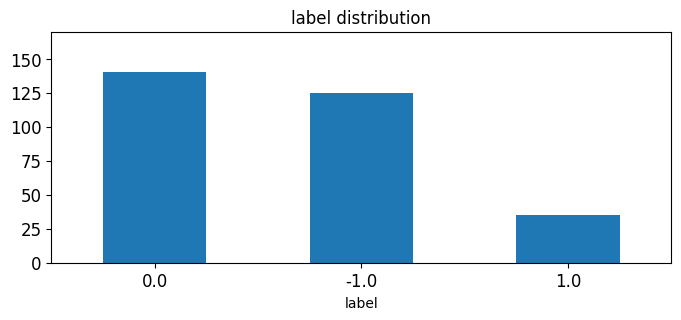

In [264]:
df_sample.label.value_counts().plot(kind = 'bar',
                                           title = 'label distribution',
                                           ylim = [0, df_sample.label.value_counts().max() + 30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## Exercise 8

<Axes: title={'center': 'label distribution'}, xlabel='label'>

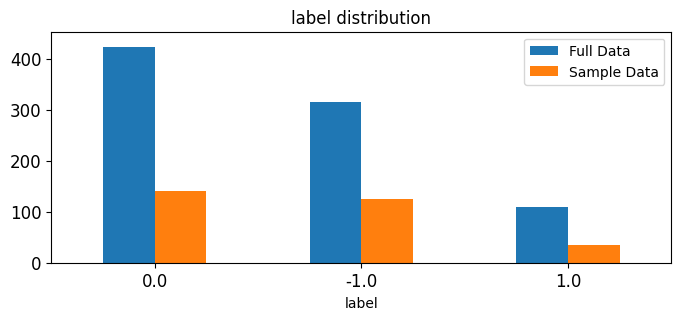

In [265]:
compare_df = pd.concat([df.label.value_counts().rename("Full Data"),df_sample.label.value_counts().rename("Sample Data")],axis=1)
compare_df.plot(kind="bar",
                title="label distribution",
                ylim=[0, compare_df.max().max() + 30],
                rot=0,
                fontsize=12,
                figsize=(8,3))
# this comparison shows that the sample should be reasonably representative of the entire dataset

## Exercise 9

In [266]:
import nltk
import helpers.data_mining_helpers as dmh
nltk.download("punkt")
nltk.download("punkt_tab")

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

[nltk_data] Downloading package punkt to /home/ethan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/ethan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [267]:
df[0:4]

,title,text,subjectivity,polarity,sentiment,label,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,-0.900000,-1.0,-1.0,"[Calls, on, retards]"
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


### Here I want to check correlation of subjectivity, polarity to label and sentiment, also decide whether to drop them and title.

              subjectivity  polarity  sentiment     label
subjectivity      1.000000  0.028133   0.041839 -0.044638
polarity          0.028133  1.000000   0.762865  0.192478
sentiment         0.041839  0.762865   1.000000  0.182239
label            -0.044638  0.192478   0.182239  1.000000


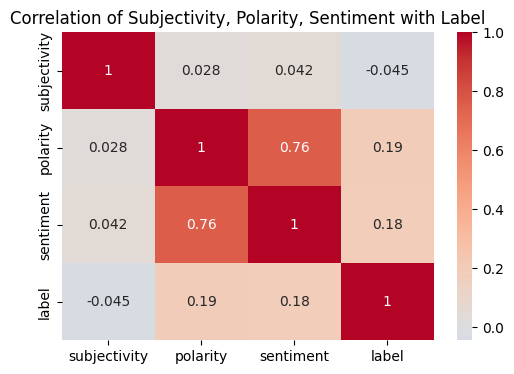

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[["subjectivity", "polarity", "sentiment", "label"]].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Subjectivity, Polarity, Sentiment with Label")
plt.show()

# we can see that low correlation for subjectivity, and high correlation between polarity and sentiment, so I will design a new feature using polarity and sentiment to test against label

                     effective_sentiment     label
effective_sentiment             1.000000  0.192478
label                           0.192478  1.000000


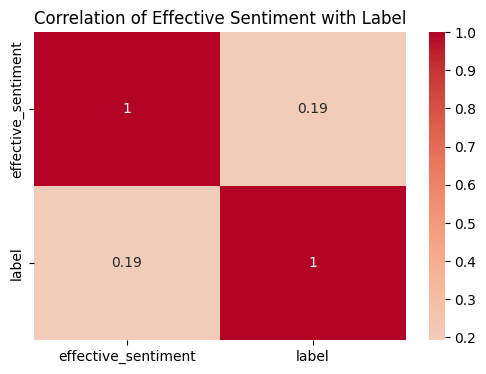

In [269]:
def create_effective_sentiment(sentiment, polarity, threshold):
    # Convert to continuous, apply polarity weighting, then discretize
    continuous_result = sentiment * abs(polarity)
    #return np.where(continuous_result > threshold, 1, np.where(continuous_result < -threshold, -1, 0))
    return continuous_result

effective_sentiment = create_effective_sentiment(df['sentiment'], df['polarity'], threshold=0.3)
df['effective_sentiment'] = effective_sentiment
corr = df[["effective_sentiment", "label"]].corr()
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Effective Sentiment with Label")
plt.show()
# this is still a low result, so I will drop these features and leave only label

In [270]:
df = df.drop(columns=['subjectivity', 'polarity', 'sentiment', 'effective_sentiment'], axis=1)

In [271]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])
analyze = count_vect.build_analyzer()
analyze(df.text[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


['calls', 'on', 'retards']

In [272]:
df_counts.shape

(847, 4346)

## Exercise 10 (Skipped)

## Exercise 11

In [273]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["text_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

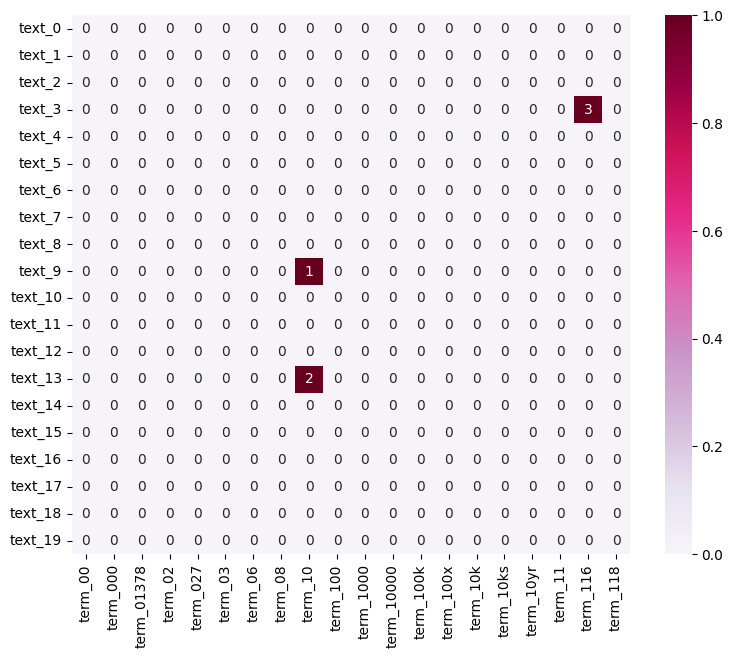

In [274]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

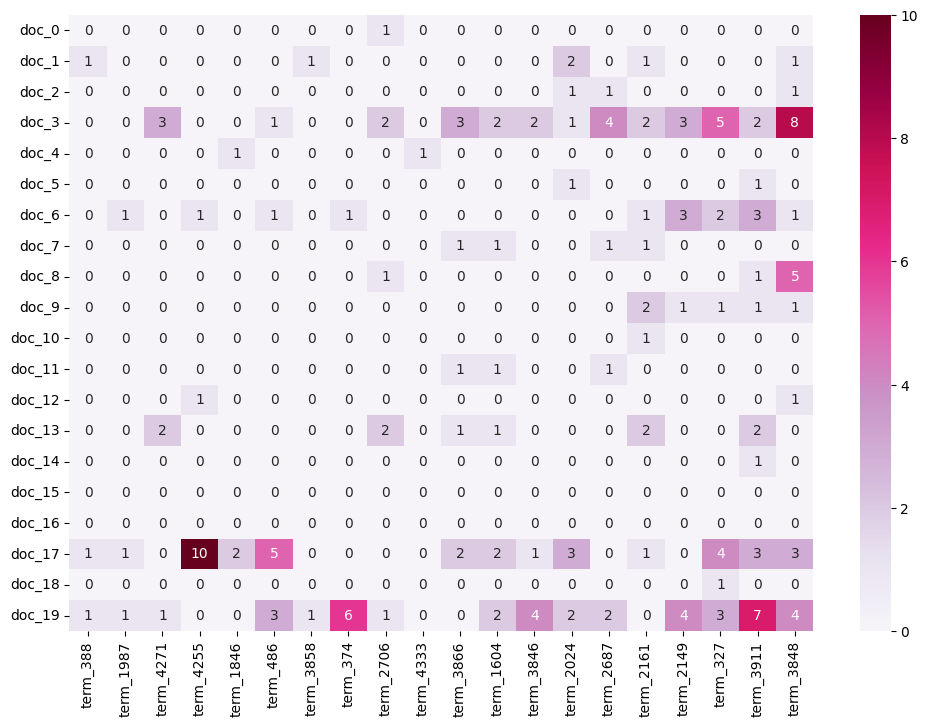

In [275]:
term_freq = df_counts.sum(axis=0).A1
top_terms_idx = np.argsort(term_freq)[-20:]  #find 20 most frequent terms

plot_x = ["term_"+str(i) for i in top_terms_idx]
plot_y = ["doc_"+ str(i) for i in range(20)]
plot_z = df_counts[0:20, top_terms_idx].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.figure(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", annot=True)
plt.show()

### Exercise 12

In [276]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0] 

np.int64(4)

In [277]:
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
             y=term_frequencies[:300],
             labels={'x': 'Terms', 'y': 'Frequency'})

fig.update_xaxes(tickangle=90)
fig.show()

## Exercise 13

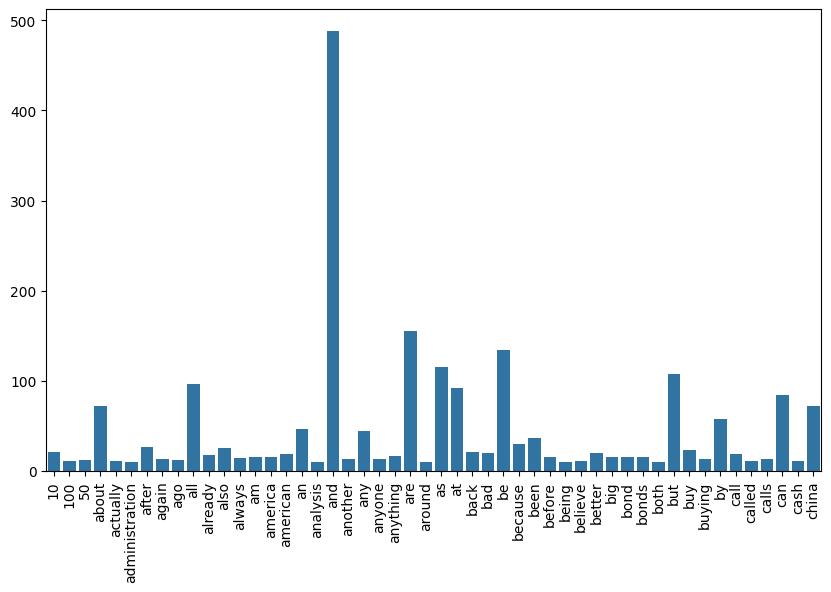

In [278]:
min_freq = 10  
frequent_terms = term_frequencies >= min_freq
filtered_terms = count_vect.get_feature_names_out()[frequent_terms]
filtered_freqs = term_frequencies[frequent_terms]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_terms[:50], y=filtered_freqs[:50])
plt.xticks(rotation=90)
plt.show()

## Exercise 14

In [279]:
import plotly.express as px

i = np.argsort(-term_frequencies)[:300] # only find top 
top_terms = count_vect.get_feature_names_out()[i]
top_freqs = term_frequencies[i]

fig = px.bar(x=top_terms, y=top_freqs)
fig.update_xaxes(tickangle=90)
fig.show()

## Exercise 15

/tmp/ipykernel_3102/1902080630.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



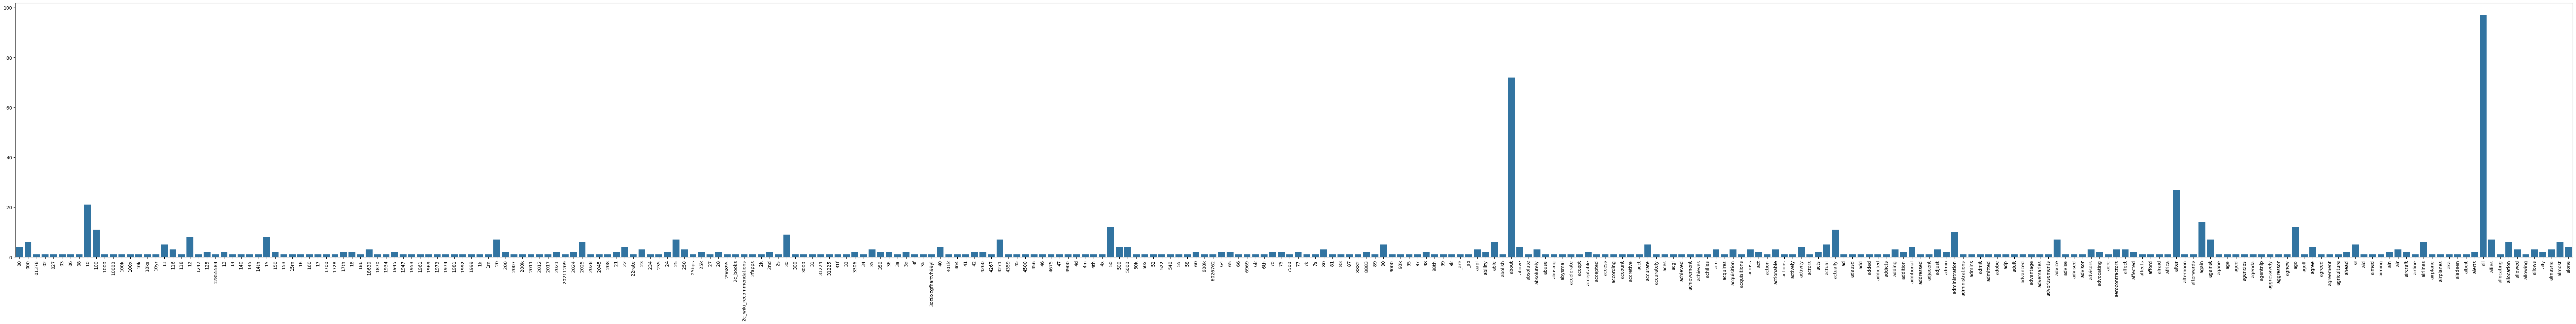

In [280]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [281]:
### Begin Assignment Here